Reading c:\Users\User\Documents\EEG_Project\rEEG\sub-101\eeg\sub-101_task-Rest_eeg.fdt
Reading 0 ... 134449  =      0.000 ...   268.898 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, P3, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 63
 projs: []
 sfreq: 500.0 Hz
>
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2', 'FCz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-p

C:\Users\User\AppData\Local\Temp\ipykernel_23156\3958150961.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(r'rEEG\sub-101\eeg\sub-101_task-Rest_eeg.set', preload=True)


Using matplotlib as 2D backend.


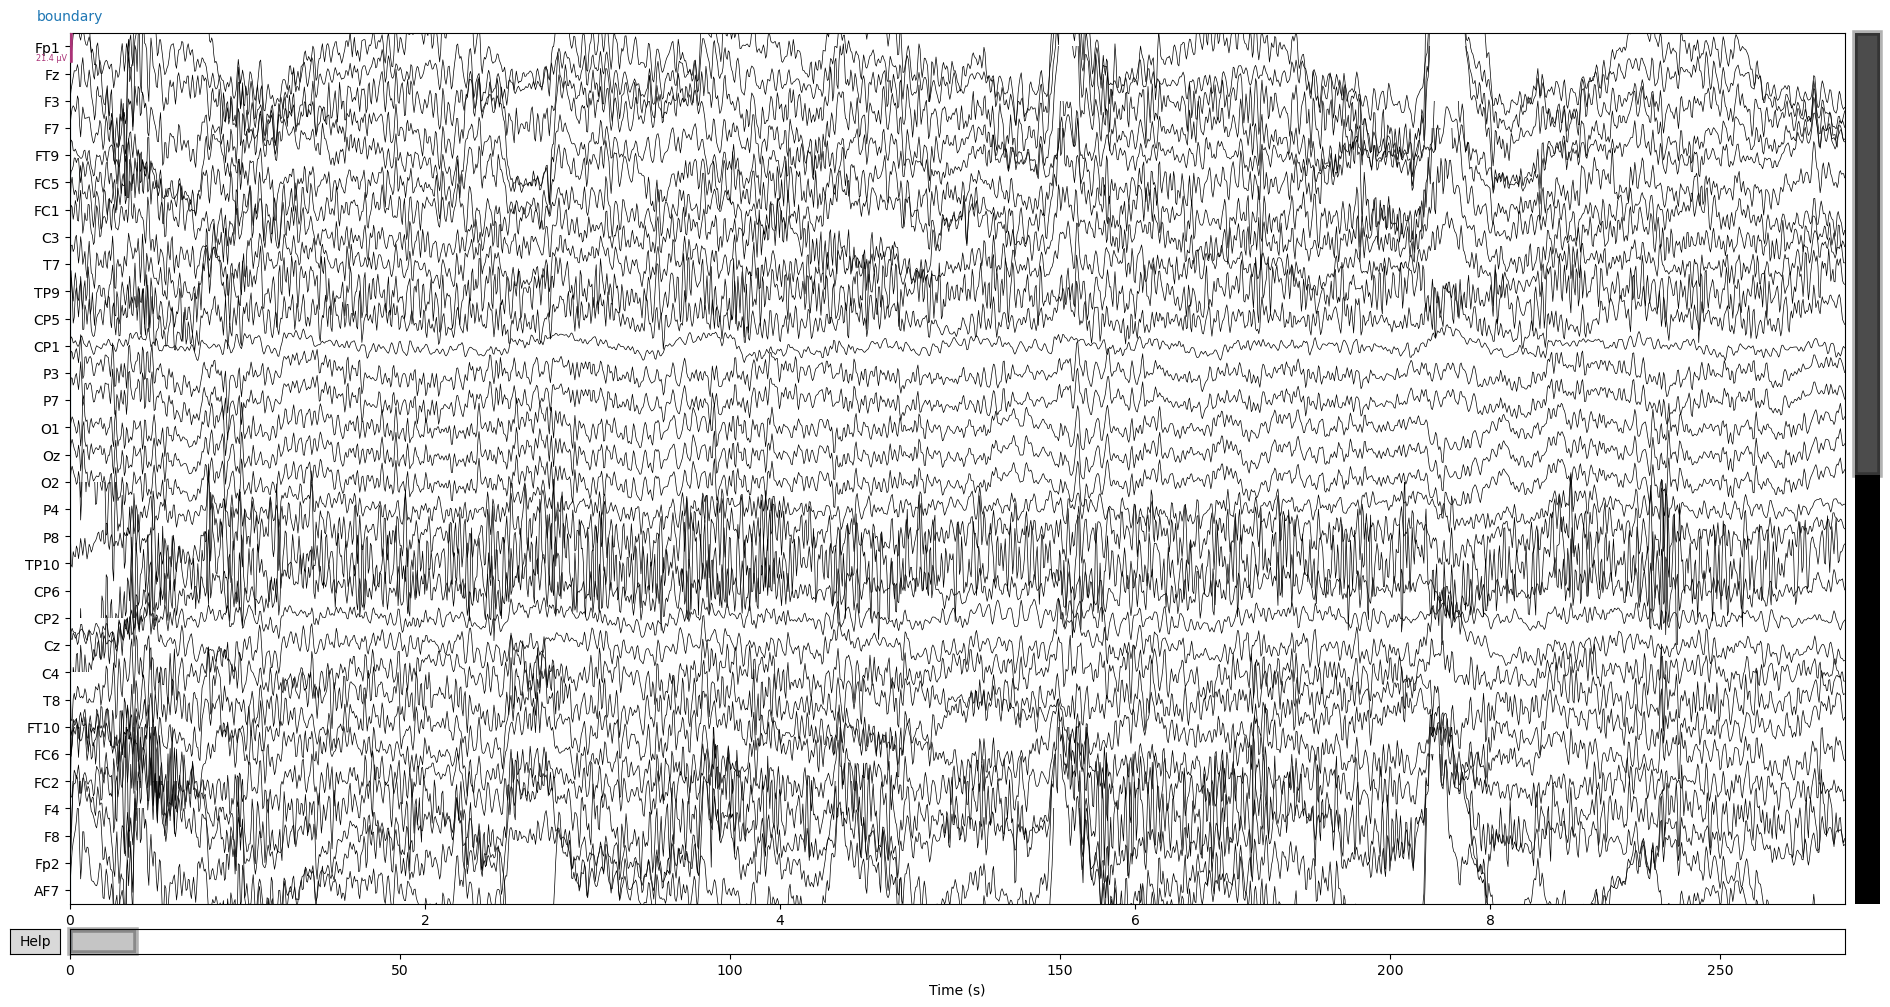

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


c:\Users\User\anaconda3\envs\eeg_ml\Lib\site-packages\mne\viz\utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


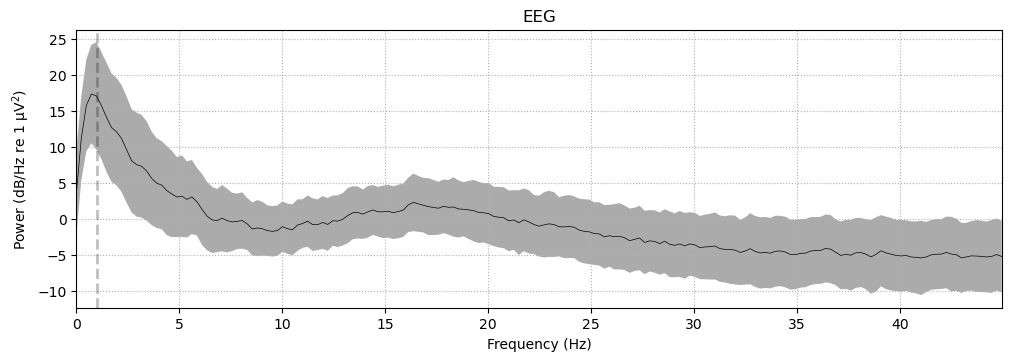

In [1]:
import mne
import matplotlib.pyplot as plt

# Load EEG data
raw = mne.io.read_raw_eeglab(r'rEEG\sub-101\eeg\sub-101_task-Rest_eeg.set', preload=True)

# Quick check
print(raw.info)
print(raw.ch_names)

# Apply a band-pass filter: 1 Hz (high-pass) to 45 Hz (low-pass)
raw.filter(l_freq=1., h_freq=45.)

# Plot the filtered data
raw.plot(
    n_channels=32,      # adjust to the number of channels you want to view
    scalings='auto',    # automatic amplitude scaling
    title='Filtered EEG: 1-45 Hz',
    show=True,
    block=True
)

# Optional: plot power spectral density (PSD) for a brainy visualization
raw.plot_psd(fmax=45, average=True)
plt.show()


In [4]:
# Example frontal and posterior channel lists
FRONTAL_CH = ['F3', 'Fz', 'F4', 'AF3', 'AF4', 'F7', 'F8']  # adjust to your montage
POSTERIOR_CH = ['P3', 'Pz', 'P4', 'O1', 'O2', 'PO3', 'PO4']  # adjust to your montage


In [5]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from mne_connectivity.viz import plot_connectivity_circle

# -------------------------
# Load and filter EEG
# -------------------------
raw = mne.io.read_raw_eeglab(r'rEEG\sub-101\eeg\sub-101_task-Rest_eeg.set', preload=True)
raw.filter(1., 45.)  # bandpass 1-45 Hz

# -------------------------
# Color channels by region
# -------------------------
frontal = FRONTAL_CH
posterior = POSTERIOR_CH
colors = ['red' if ch in frontal else 'blue' for ch in raw.ch_names]

# -------------------------
# Create figure: EEG + connectivity
# -------------------------
fig = plt.figure(figsize=(18, 12))

# --- EEG traces ---
ax0 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
raw.plot(n_channels=len(raw.ch_names), color=colors, scalings='auto', axes=ax0, show=False)
ax0.set_title("Filtered EEG 1-45 Hz (Red = Frontal, Blue = Posterior)", fontsize=18)

# --- Connectivity circles ---
for i, lab in enumerate([0, 1]):
    ax = plt.subplot2grid((2, 2), (1, i), polar=True)
    title_str = "PD Unimpaired (MoCA ≥ 26)" if lab == 0 else "PD Impaired (MoCA < 26)"
    mat_to_plot = get_avg_full_mat(lab)
    
    # Dynamic color scale based on all group data
    all_vals = np.concatenate([group_mats[0], group_mats[1]])
    vmin, vmax = np.percentile(all_vals, 0), np.percentile(all_vals, 99)
    
    plot_connectivity_circle(
        mat_to_plot,
        node_names,
        n_lines=30,
        title=title_str,
        ax=ax,
        show=False,
        colormap='hot',
        vmin=vmin,
        vmax=vmax,
        textcolor='black',
        facecolor='white',
        fontsize_title=16
    )

plt.tight_layout()
plt.show()


Reading c:\Users\User\Documents\EEG_Project\rEEG\sub-101\eeg\sub-101_task-Rest_eeg.fdt
Reading 0 ... 134449  =      0.000 ...   268.898 secs...


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 s)



C:\Users\User\AppData\Local\Temp\ipykernel_23156\158960908.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(r'rEEG\sub-101\eeg\sub-101_task-Rest_eeg.set', preload=True)


TypeError: BaseRaw.plot() got an unexpected keyword argument 'axes'

In [9]:
import mne
import matplotlib.pyplot as plt

# -----------------------------
# Load raw data
# -----------------------------
raw = mne.io.read_raw_eeglab(r'rEEG\sub-121\eeg\sub-121_task-Rest_eeg.set', preload=True)

# -----------------------------
# Filter
# -----------------------------
raw.filter(1., 45.)  # bandpass 1-45 Hz

# -----------------------------
# Define regions
# -----------------------------
FRONTAL_CH = ['F3', 'Fz', 'F4', 'AF3', 'AF4', 'F7', 'F8']  
POSTERIOR_CH = ['P3', 'Pz', 'P4', 'O1', 'O2', 'PO3', 'PO4']  

colors = ['red' if ch in FRONTAL_CH else 'blue' for ch in raw.ch_names]
# -----------------------------
# Make colors for all channels
# -----------------------------
colors = []
for ch in raw.ch_names:
    if ch in FRONTAL_CH:
        colors.append('red')
    elif ch in POSTERIOR_CH:
        colors.append('blue')
    else:
        colors.append('gray')  # any channels not in your lists

# Check lengths match
print(len(colors), len(raw.ch_names))  # should be equal

# -----------------------------
# Plot
# -----------------------------
raw.plot(n_channels=len(raw.ch_names), color=colors, scalings='auto', show=True)


Reading c:\Users\User\Documents\EEG_Project\rEEG\sub-121\eeg\sub-121_task-Rest_eeg.fdt
Reading 0 ... 75399  =      0.000 ...   150.798 secs...


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 s)



C:\Users\User\AppData\Local\Temp\ipykernel_23156\3455223689.py:7: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(r'rEEG\sub-121\eeg\sub-121_task-Rest_eeg.set', preload=True)


63 63


ValueError: RGBA sequence should have length 3 or 4